In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import casadi
import os
import sys
from matplotlib.ticker import FuncFormatter

storage_range = np.linspace(2, 40, 5)
heatpump_range = np.linspace(2, 30, 5)

cost_values = np.array([[ np.nan,  np.nan,  np.nan,  np.nan,  np.nan],
       [2.87, 1.98, 1.48, 1.28, 1.26],
       [2.87, 1.97, 1.42, 1.14, 1.  ],
       [2.87, 1.96, 1.4 , 1.12, 0.98],
       [2.87, 1.96, 1.4 , 1.11, 0.97]])

cost_values2 = np.array([[  np.nan,   np.nan,   np.nan,   np.nan,   np.nan],
       [  np.nan,   np.nan,   np.nan,   np.nan,   np.nan],
       [  np.nan,   np.nan,   np.nan,   np.nan,   np.nan],
       [12.15, 11.11, 10.28,  9.92,  9.86],
       [12.15, 11.09, 10.06,  9.19,  8.35]])

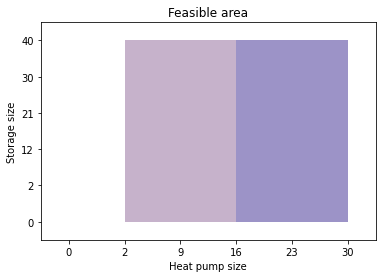

In [2]:
# rows: heat pump capacity
# cols: storage capacity

num_hp = len(cost_values[:][0])
num_stor = len(cost_values[0])

# Iterate over indices and assign colors based on non-np.nan values
for i in range(num_hp):
    for j in range(num_stor):
        
        # First load
        if not np.isnan(cost_values[i][j]):
            cost_values[i][j] = 1
        else:
            cost_values[i][j] = np.nan

        # Second load
        if not np.isnan(cost_values2[i][j]):
            cost_values2[i][j] = 1
        else:
            cost_values2[i][j] = np.nan

# Plot filled area
plt.pcolormesh(np.transpose(cost_values), cmap='viridis', edgecolors='none',alpha=0.3)
plt.pcolormesh(np.transpose(cost_values2), cmap='coolwarm', edgecolors='none',alpha=0.3)

# Set labels and title
plt.xlabel('Heat pump size')
plt.ylabel('Storage size')
plt.title('Feasible area')

# Get current xticks and multiply each by 2
xticks = plt.xticks()[0]
modified_xticks = [round(heatpump_range[int(x-1)]) if x>0 else 0 for x in xticks]
yticks = plt.yticks()[0]
modified_yticks = [round(storage_range[int(x-1)]) if x>0 else 0 for x in yticks]

# Set the modified xticks back to the plot
plt.xticks(xticks, modified_xticks)
plt.yticks(yticks, modified_yticks)

plt.xlim([-0.5,num_hp+0.5])
plt.ylim([-0.5,num_stor+0.5])

plt.show()